# 광고와 매출 관계

## 1. 기본

- training, test 데이터 두 개로 나누기. training 데이터는 학습할 때, test 데이터는 성능을 측정할 때 사용. 서로가 완벽하게 분리돼야 한다.
- TV, Radio, Newspaper 컬럼은 해당 매체에 광고를 한 비용을 의미하고, Sales는 광고를 그렇게 했을 때 나온 매출 데이터
- 매체별 광고량과 매출이 어떤 관계가 있는지 분석하는 것이 목표

```
"","TV","Radio","Newspaper","Sales"
"1",230.1,37.8,69.2,22.1
"2",44.5,39.3,45.1,10.4
"3",17.2,45.9,69.3,9.3
"4",151.5,41.3,58.5,18.5
.
.
.
```

## 2, Simple Lenear Regression

### 2.1 개념

![objective_func](http://i.imgur.com/4YS5m1K.png)

- 대부분의 머신러닝 알고리즘은 데이터를 가장 잘 설명하는 model을 찾는 방법론이며 Linear Regression일 때 model은 1차 선형 함수다. 즉 데이터가 linear한 관계를 가지고 있다고 가정하고 진행하는 것.
- 데이터를 잘 설명한다는 것은 objective function(목표함수)의 결과값 b0, b1을 찾는다는 것. Linear regression의 objective function 위 이미지의 공식이다.
- b0, b1이 가장 적합하다는 것은 다음 세 가지 말과 일치한다.
    - objective function의 결과값인 b0, b1
    - Log likelihood를 최대화하는 b0, b1
    - Cost function의 값을 최소화하는 b0, b1
- Cost function은 무엇일까
    - 우선 loss란 : 각각의 데이터에 대해서 y_predict 값과 실제 y값의 차이를 의미
    - Squared loss란 : loss를 제곱한 값
    - cost(=error)란: 모든 데이터에 대한 Squared loss들을 합한 값. cost와 error는 같은 말이며 cost function, error function은 역시 같은 함수
    - loss, error, cost 사람마다 다르게 이야기하는 경우가 많으며 중요한 것은 모두 줄여야한다는 것. 그렇게 이해하면 된다.
- b0, b1을 찾는 것은 Gradient descent 알고리즘을 사용한다.
- 순서
    + 먼저 b0, b1의 초기값을 설정한다.
    + cost function에서 b0, b1 각각을 편미분한다.
    + "b0, b1 각각의 새로운 값 = 기존 값 - learning rate * 각각의 편미분값"
    + 목표 함수가 `converge` 할 때까지 반복한다. converge한다는 것은 두 가지 경우가 있다.
        * b0, b1이 거의 안 변할 때까지
        * Log likelihood가 거의 안 변할 때 까지

### 2.2 구현

#### 2.2.1 라이브러리

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

#### 2.2.2 Simple linear regression

In [2]:
def one_var_advertising_pred(x_vec, y_vec, x_label, y_label, rs=108):
    filename = "advertising_fig_simple_train_test_{}.png".format(x_label)

    x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.2, random_state=rs)

    regr = linear_model.LinearRegression()

    regr.fit(x_train, y_train)
    predicted_y_test = regr.predict(x_test)
    print(filename)
    print("Independent variable: {}".format(x_label))
    print("Coefficients: {}".format(regr.coef_))
    print("Intercept: {}".format(regr.intercept_))
    print("RSS on test data: {}".format(np.sum((predicted_y_test - y_test) ** 2)))
    print("MSE on test data: {}".format(mean_squared_error(y_test, predicted_y_test)))
    print("R^2 on test data: {}".format(r2_score(y_test, predicted_y_test)))
    # Another way to compute the R^2 score
    # print("R^2 on test data: {}".format(regr.score(x_test, y_test)))
    print()

    plt.scatter(x_train, y_train, color='black')
    plt.plot(x_train, regr.predict(x_train), color='blue', linewidth=3)

    plt.xlim((0, int(max(x_vec) * 1.1)))
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)

    # plt.savefig(filename)
    plt.show()
    plt.close()

- `train_test_split` : x, y 데이터를 원하는 비율로 train, test 데이터로 나눈다.
- `linear_model`
    + scikit-leran의 linear model.
    + 이 객체에서 `fit` 함수를 호출해서 학습하고, `predict` 로 에측한다.
    + `regr.coef_` : coefficient, 즉 weight 값을 리턴
    + `regr.intercept_` : intercept, 즉 y 절편 값을 리턴
- RSS(Residual Sum of Squares) : 모든 Squared loss의 합인 cost. 클 수록 안좋다.
- MSE(Mean Squared Error) : RSS를 데이터 수로 나눈 것. 클 수록 안좋다.
- R^2: 두 데이터 간의 상관관계를 r value라 하고 그것을 제곱한 값이다. 클 수록 좋다.


#### 2.2.3 실행

/Users/qbinson/.virtualenvs/python-ml/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


advertising_fig_simple_train_test_TV.png
Independent variable: TV
Coefficients: [[ 0.04861666]]
Intercept: [ 6.97391383]
RSS on test data: 435.25213636700136
MSE on test data: 10.881303409175034
R^2 on test data: 0.5559354016793248



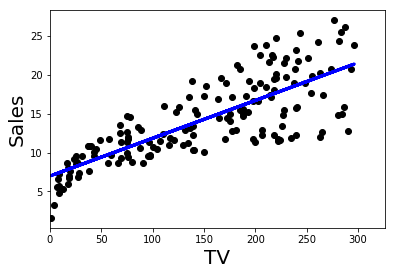

advertising_fig_simple_train_test_Radio.png
Independent variable: Radio
Coefficients: [[ 0.20288379]]
Intercept: [ 9.42990656]
RSS on test data: 690.5702835072512
MSE on test data: 17.26425708768128
R^2 on test data: 0.29544787966469455



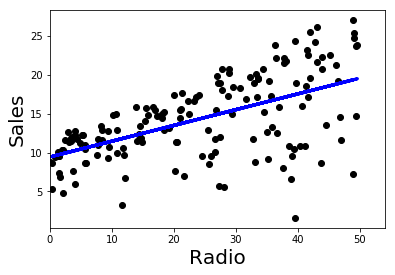

advertising_fig_simple_train_test_Newspaper.png
Independent variable: Newspaper
Coefficients: [[ 0.05728486]]
Intercept: [ 12.4265411]
RSS on test data: 1014.8670256324453
MSE on test data: 25.371675640811134
R^2 on test data: -0.035414832993195366



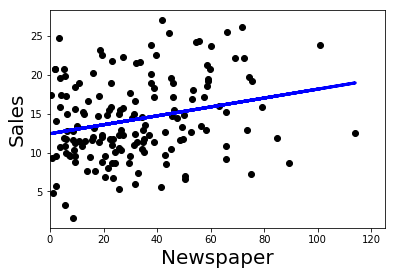

In [3]:
def main():
    data = pd.read_csv("./Advertising.csv", header=0)
    response_var = -1
    y_vec = data.ix[:, response_var].as_matrix().reshape(-1, 1)
    y_label = data.columns[response_var]

    for independent_var in range(1, 4):
        try:
            x_vec = data.ix[:, independent_var].as_matrix().reshape(-1, 1)
            x_label = data.columns[independent_var]

            one_var_advertising_pred(x_vec, y_vec, x_label, y_label)
        except ValueError:
            pass

if __name__ == "__main__":
    main()

## 3. Multiple Linear Regression 구현

### 3.1 개념

\begin{align}
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p
\end{align}

- 여러 feature들을 이용해서 모델을 만든다. 모델의 형태는 위와 같고 모든 b 값을 계산한다.
- 역시 Simple LR에서처럼 `(Y_real - Y_pred)^2` 가 Squared loss다. 모든 Squared loss의 합, 즉 cost를 가장 적게 하는 b들을 구하면 된다.
- Gradient descent 알고리즘을 써서 각 b들의 편미분 값을 활용해서 b를 변화시켜간다. 원리는 Simple LR과 같다.

### 3.2 구현

In [4]:
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


def main():
    data = pd.read_csv("./Advertising.csv", header=0)
    response_var = -1
    y_vec = data.ix[:, response_var].as_matrix().reshape(-1, 1)
    y_label = data.columns[response_var]

    x_label = ", ".join(data.columns[range(1, 4)])
    x_mat = data.ix[:, range(1, 4)].as_matrix().reshape(-1, 3)
    multi_var_advertising(x_mat, y_vec, x_label)


def multi_var_advertising(x_mat, y_vec, x_label, rs=108):
    x_train, x_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=0.2, random_state=rs)

    regr = linear_model.LinearRegression()

    regr.fit(x_train, y_train)
    predicted_y_test = regr.predict(x_test)
    print("Independent variables: {}".format(x_label))
    print("Coefficients: {}".format(regr.coef_))
    print("Intercept: {}".format(regr.intercept_))
    print("RSS on test data: {}".format(np.sum((predicted_y_test - y_test) ** 2)))
    print("R^2 on test data: {}".format(r2_score(y_test, predicted_y_test)))
    print()


if __name__ == "__main__":
    main()


Independent variables: TV, Radio, Newspaper
Coefficients: [[ 0.04646957  0.18526393  0.00055852]]
Intercept: [ 2.87873703]
RSS on test data: 107.61708497281542
R^2 on test data: 0.8902040136786371

